Saving cleaned_fitness_data.xlsx to cleaned_fitness_data (1).xlsx


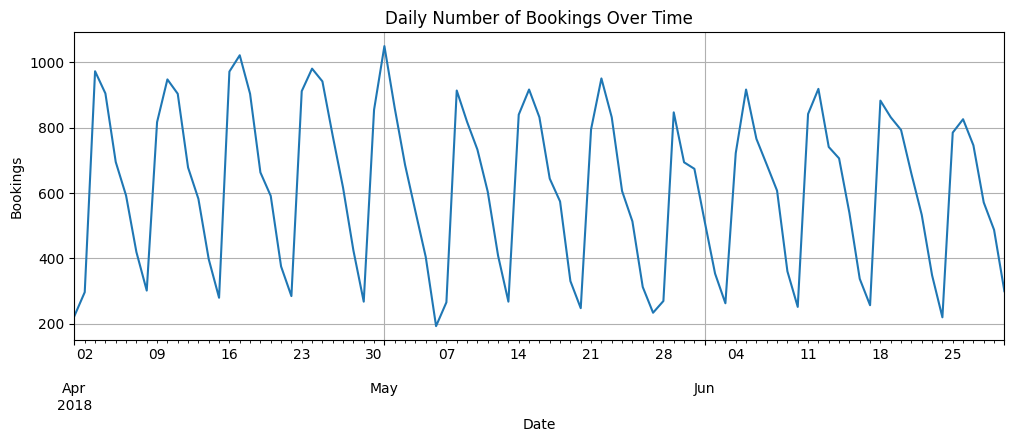

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


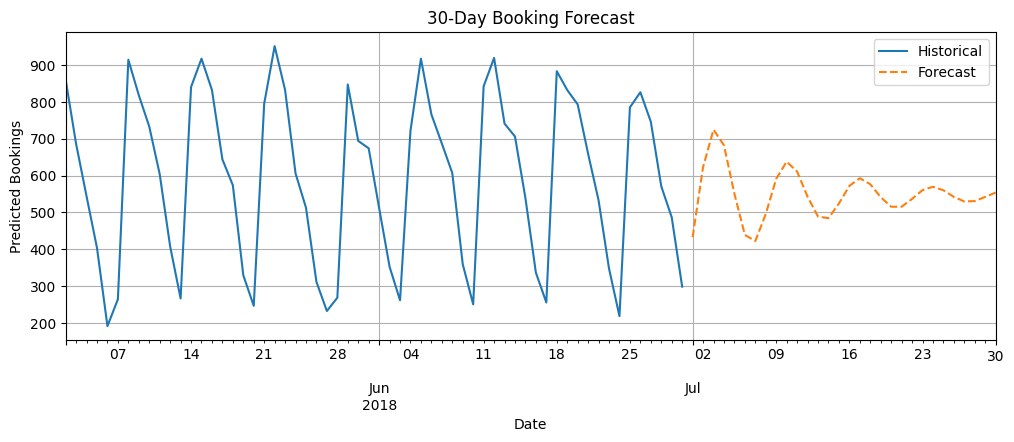

In [2]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Step 2: Load file (upload in Colab)
from google.colab import files
uploaded = files.upload()

# Step 3: Read the data
df = pd.read_excel("cleaned_fitness_data.xlsx")

# Step 4: Parse and clean date column
df['BookingEndDateTime_Month___Day___Year'] = pd.to_datetime(df['BookingEndDateTime_Month___Day___Year'], errors='coerce')
df = df.dropna(subset=['BookingEndDateTime_Month___Day___Year', 'Number_Booked'])

# Step 5: Create daily time series (aggregate bookings per day)
df_ts = df.groupby('BookingEndDateTime_Month___Day___Year')['Number_Booked'].sum()
df_ts = df_ts.asfreq('D').fillna(0)

# Plot the time series
plt.figure(figsize=(12, 4))
df_ts.plot()
plt.title("Daily Number of Bookings Over Time")
plt.xlabel("Date")
plt.ylabel("Bookings")
plt.grid(True)
plt.show()

# Step 6: Fit ARIMA model
model = ARIMA(df_ts, order=(2, 1, 2))
model_fit = model.fit()

# Step 7: Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Step 8: Plot forecast
plt.figure(figsize=(12, 4))
df_ts[-60:].plot(label='Historical')
forecast.plot(label='Forecast', style='--')
plt.title("30-Day Booking Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Bookings")
plt.legend()
plt.grid(True)
plt.show()
